In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 8), 'figure.dpi': 140})

In [ ]:
data=pd.read_csv("HD.csv",index_col='Date',parse_dates=True)



In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-17,125.870003,129.139999,125.699997,128.929993,114.675789,6801200
2016-11-18,128.929993,129.360001,127.720001,128.330002,114.142120,4428900
2016-11-21,128.279999,128.899994,127.410004,128.220001,114.044281,4072100
2016-11-22,128.380005,131.300003,128.380005,130.979996,116.499130,5535800
2016-11-23,131.360001,131.990005,130.860001,131.210007,116.703728,3582700
...,...,...,...,...,...,...
2021-11-10,368.250000,371.209991,367.720001,368.579987,368.579987,2161400
2021-11-11,371.000000,372.000000,365.829987,367.630005,367.630005,2387300
2021-11-12,369.119995,373.500000,366.700012,372.630005,372.630005,2792600


In [ ]:
data=data[['Close']]
data

,Close
Date,
2016-11-17,128.929993
2016-11-18,128.330002
2016-11-21,128.220001
2016-11-22,130.979996
2016-11-23,131.210007
...,...
2021-11-10,368.579987
2021-11-11,367.630005
2021-11-12,372.630005


In [ ]:
data.describe()

,Close
count,1258.000000
mean,218.782178
std,58.913478
min,128.220001
25%,176.650005
50%,202.335007
75%,265.275002
max,392.329987


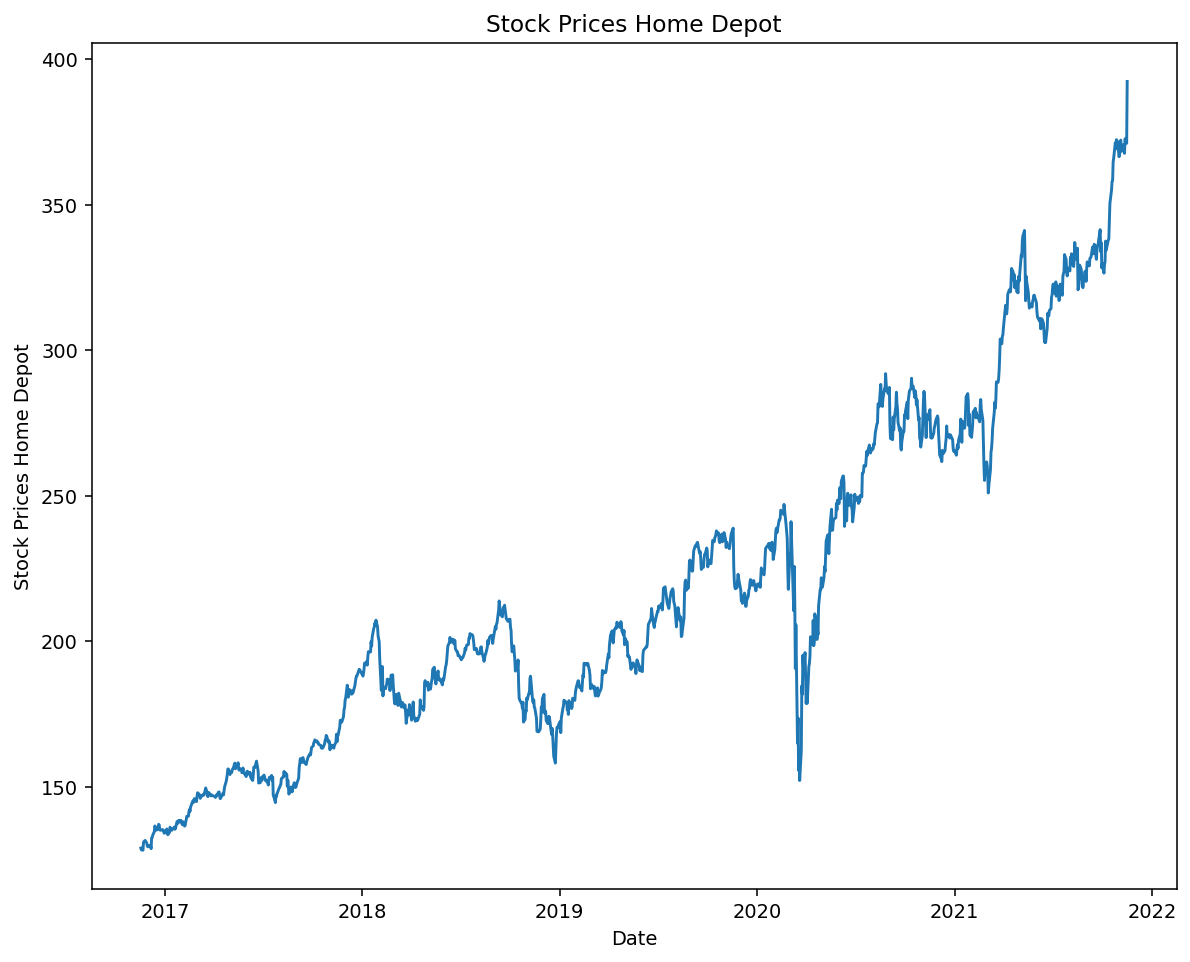

In [ ]:
plt.xlabel('Date')
plt.ylabel('Stock Prices Home Depot')
plt.title('Stock Prices Home Depot')
plt.plot(data)

In [ ]:
roll_mean=data.rolling(window=10).mean()
roll_std=data.rolling(window=10).std()

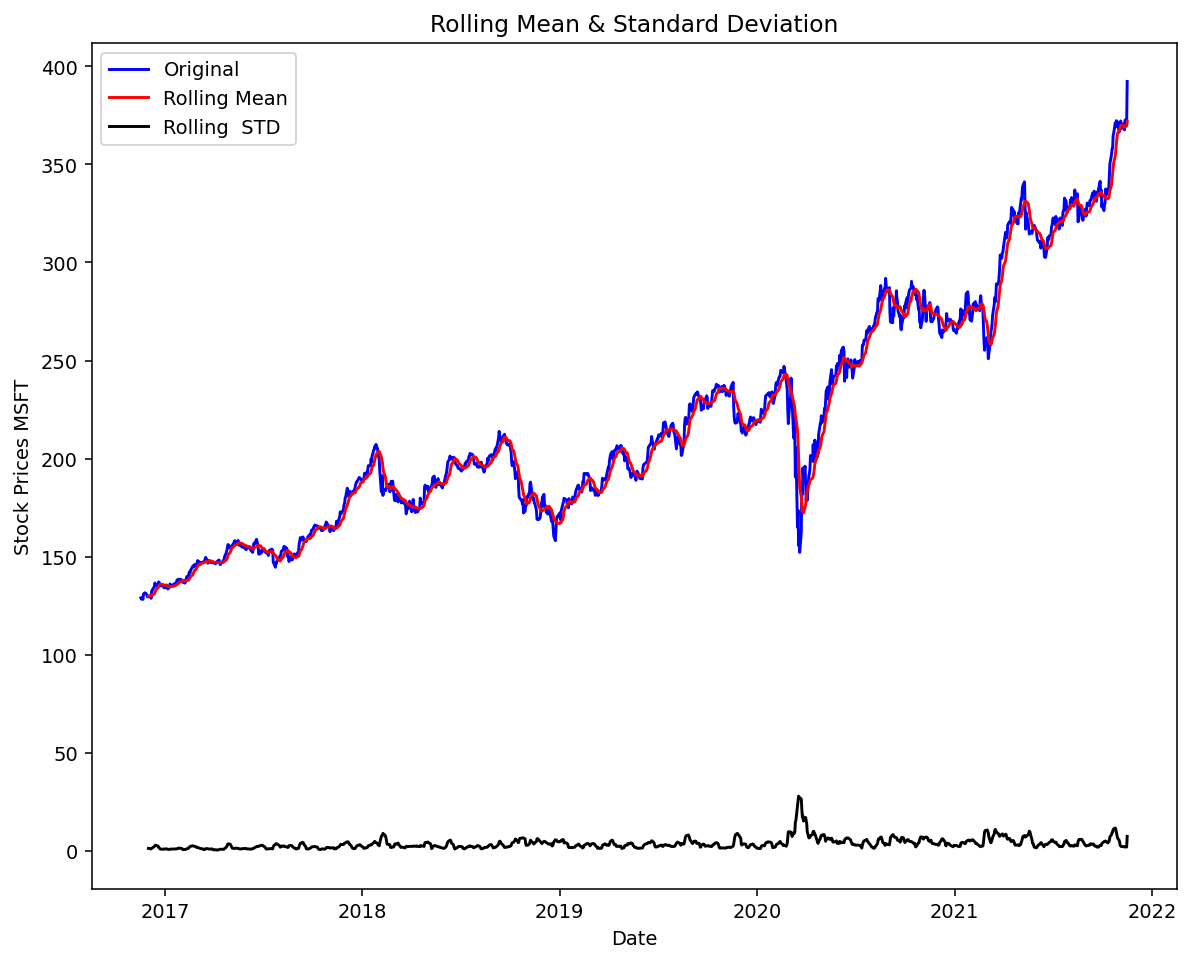

In [ ]:
original=plt.plot(data,color='blue',label='Original')
mean=plt.plot(roll_mean,color='red',label='Rolling Mean')
std=plt.plot(roll_std,color='black',label='Rolling  STD')
plt.xlabel('Date')
plt.ylabel('Stock Prices MSFT')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
result = seasonal_decompose(data['Close'],model='multiplicative',freq=1)

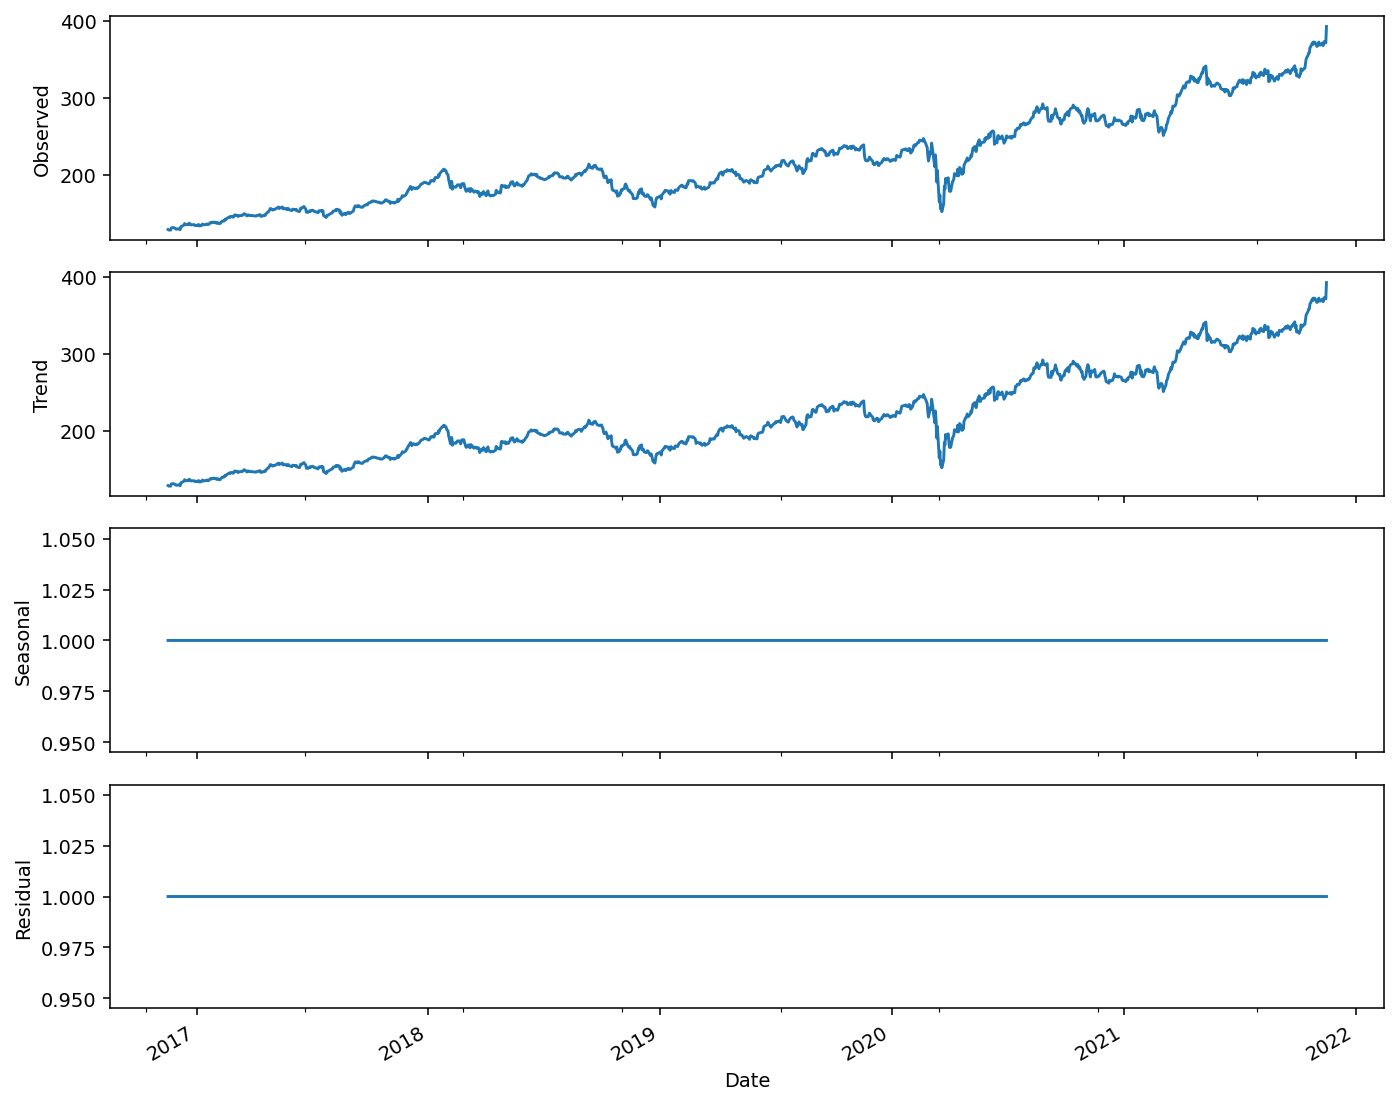

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=10,8
result.plot();

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def ad_test(dataset):
     dftest = adfuller(dataset)
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [ ]:
ad_test(data['Close'])

1. ADF :  0.4744873861859998
2. P-Value :  0.9840766819064242
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression: 1248
5. Critical Values :
	 1% :  -3.4356006420838963
	 5% :  -2.8638586845641063
	 10% :  -2.5680044958343604


In [ ]:
df=data.diff(1)

In [ ]:
df=df.dropna()

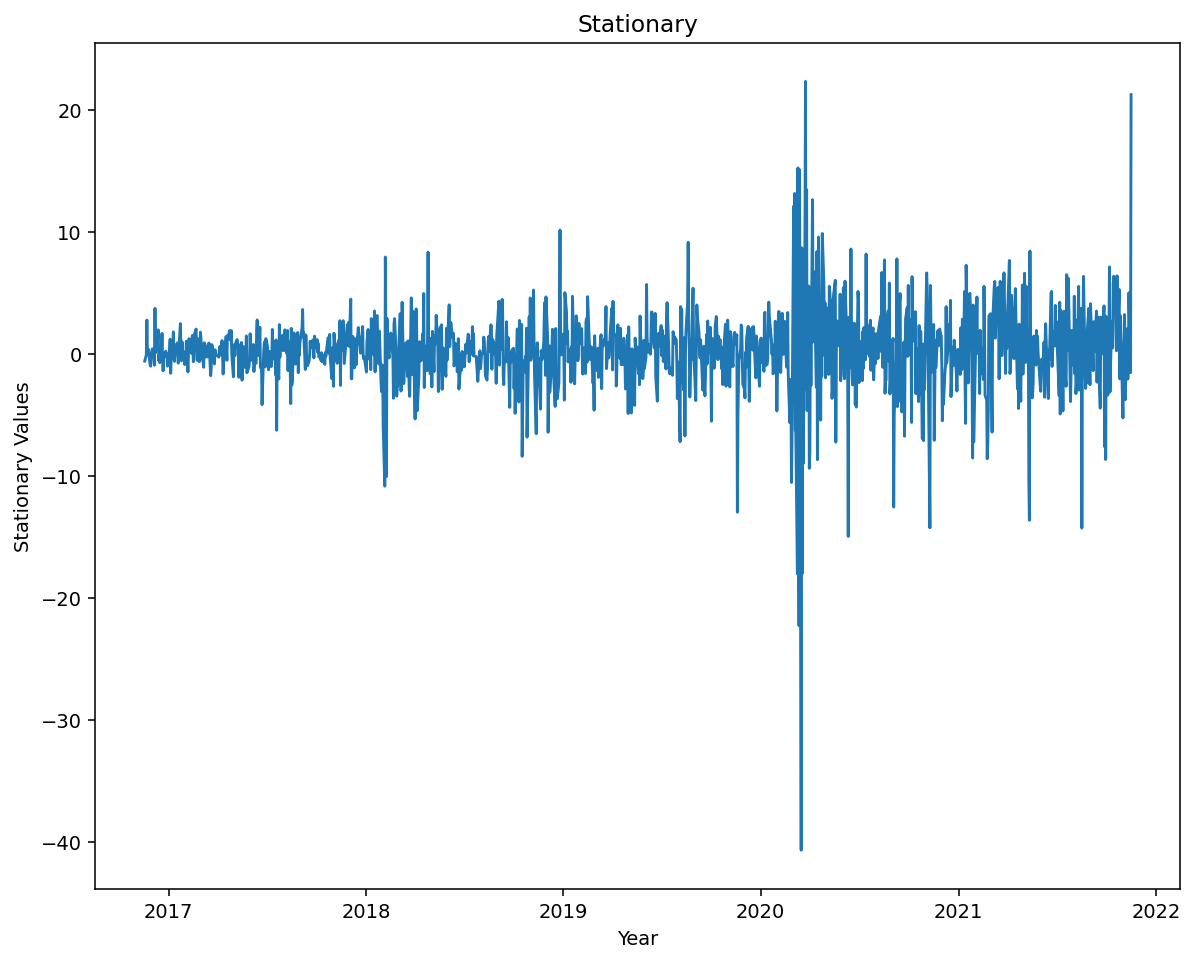

In [ ]:
plt.xlabel('Year')
plt.ylabel('Stationary Values')
plt.title('Stationary')
plt.plot(df)

In [ ]:
ad_test(df['Close'])

1. ADF :  -11.245858524357729
2. P-Value :  1.760402366100886e-20
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression: 1248
5. Critical Values :
	 1% :  -3.4356006420838963
	 5% :  -2.8638586845641063
	 10% :  -2.5680044958343604


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

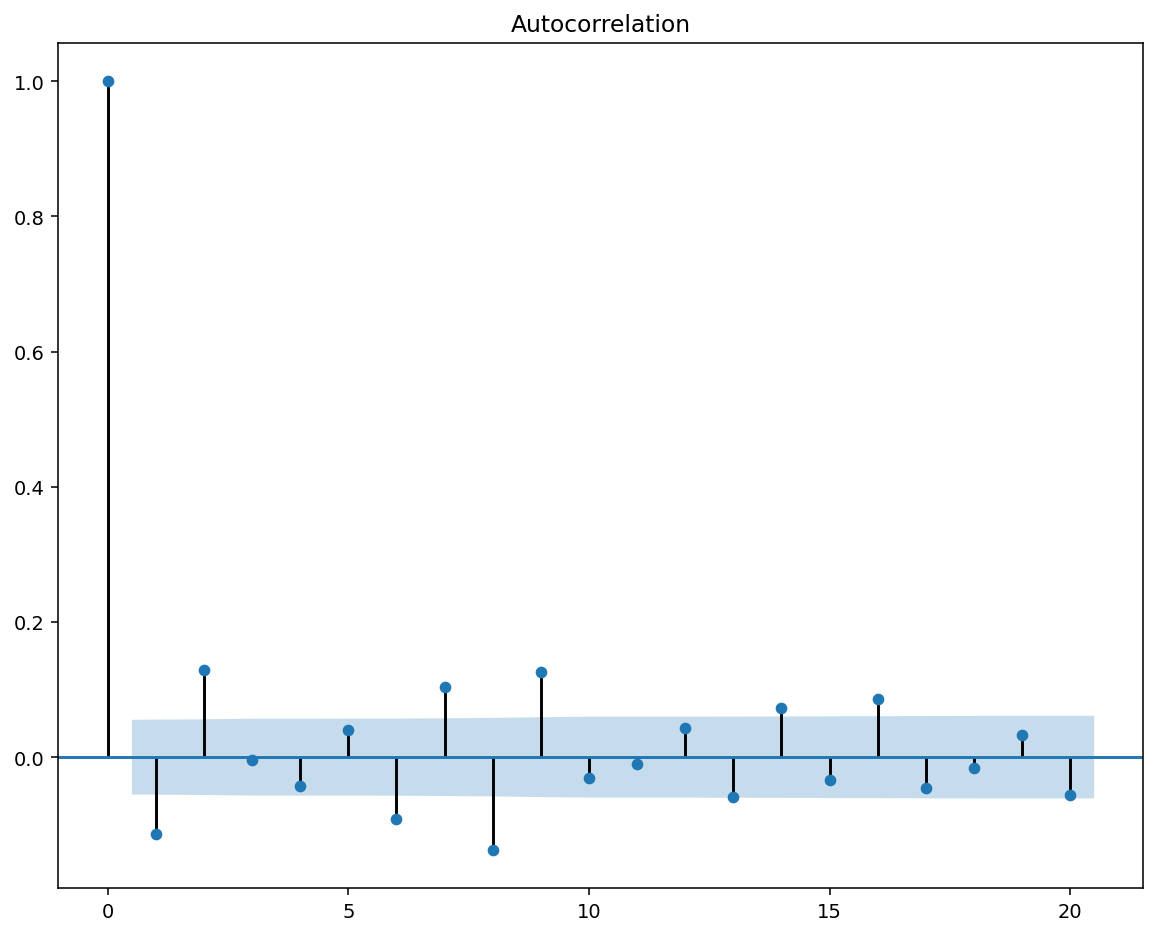

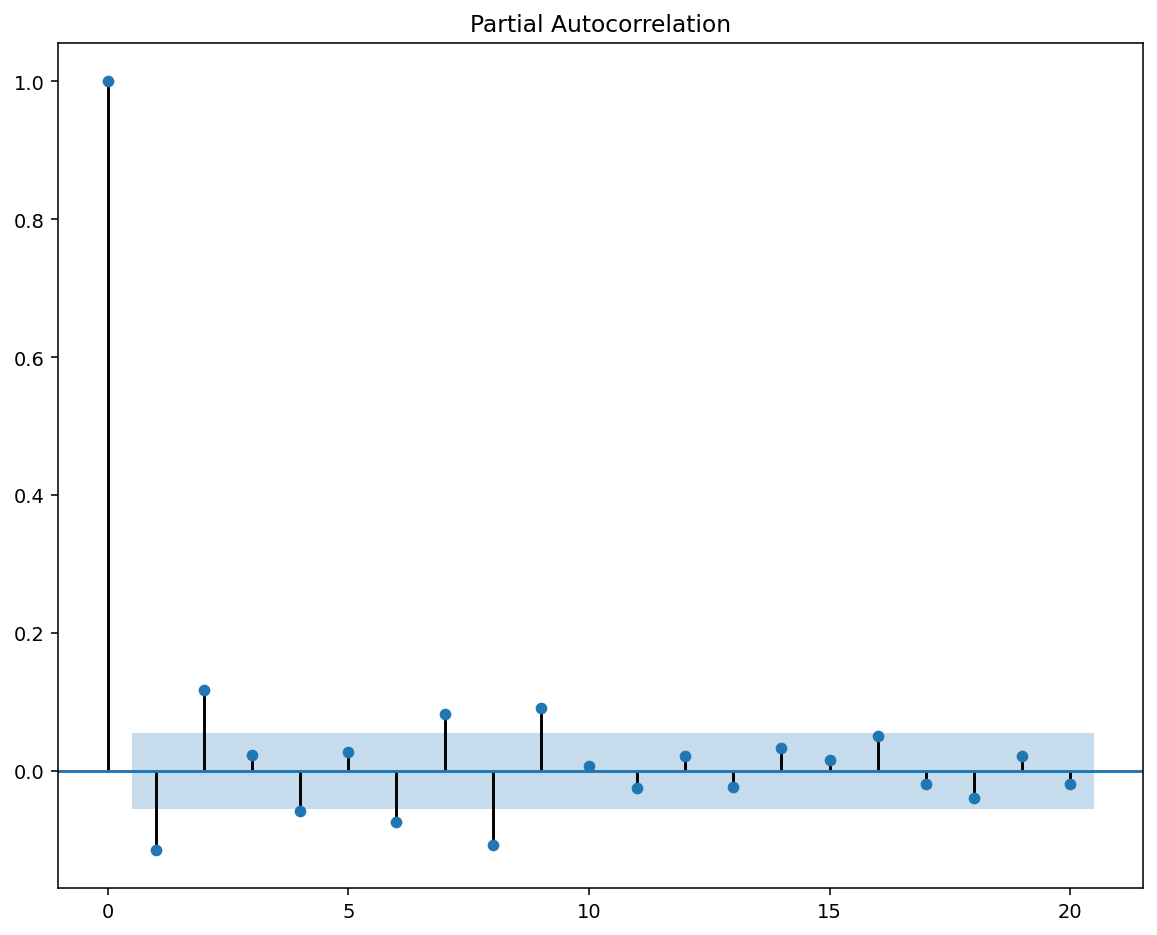

In [ ]:
plot_acf(df['Close'], lags=20);
plot_pacf(df['Close'], lags=20);

In [ ]:
order=(1,1,1)

In [ ]:
! pip install pmdarima

     |████████████████████████████████| 1.4 MB 30.7 MB/s 
     |████████████████████████████████| 9.8 MB 49.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
step=auto_arima(data,start_p=0,start_q=0,start_d=0,max_p=9,max_q=9,seasonal=False,trace=True,m=52)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6732.592, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6717.555, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6721.026, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6735.047, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6701.491, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6702.807, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6703.138, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6711.130, Time=0.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6686.027, Time=1.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=6683.787, Time=1.65 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=6700.603, Time=0.35 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=6684.467, Time=1.96 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6672.008, Time=3.47 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6671.495, Time=1.45 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept

In [ ]:
step.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -3328.747
Date:                Sun, 21 Nov 2021   AIC                           6671.495
Time:                        11:09:08   BIC                           6707.450
Sample:                             0   HQIC                          6685.008
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6878      0.333      2.063      0.039       0.034       1.341
ar.L1         -1.6175      0.046    -35.457      0.000      -1.707      -1.528
ar.L2         -0.7314      0.061    -12.083      0.000      -0.850      -0.613
ar.L3          0.0609      0.020      3.000      0.003       0.021       0.101
ma.L1          1.5430      0.041     37.913      0.000       1.463       1.623
ma.L2          0.7029      0.040     17.609      0.000       0.625       0.781
sigma2        11.6844      0.212     55.057      0.000      11.268      12.100
===================================================================================
Ljung-Box (Q):                       46.93   Jarque-Bera (JB):             11861.49
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               5.06   Skew:                            -1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit=auto_arima(data['Close'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6702.698, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6732.592, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6717.555, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6721.026, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6735.047, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6701.314, Time=0.54 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6699.557, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6701.227, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6711.130, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6702.663, Time=1.81 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=6701.802, Time=0.11 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 5.125 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -3345.778
Date:                Sat, 20 Nov 2021   AIC                           6699.557
Time:                        14:14:31   BIC                           6720.103
Sample:                             0   HQIC                          6707.278
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2100      0.107      1.956      0.050      -0.000       0.420
ma.L1         -0.1027      0.015     -6.694      0.000      -0.133      -0.073
ma.L2          0.1421      0.011     12.628      0.000       0.120       0.164
sigma2        12.0073      0.184     65.309      0.000      11.647      12.368
===================================================================================
Ljung-Box (Q):                       81.57   Jarque-Bera (JB):             13933.02
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.27   Skew:                            -1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
len(data)*0.8

1006.4000000000001

In [ ]:
train=data.iloc[:1006]
test=data.iloc[1006:]

In [ ]:
model=ARIMA(train['Close'],order=(3,1,2))
model=model.fit()

In [ ]:
pred = pd.DataFrame(pd.np.empty((0,2)))

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ = 'levels').rename('Arima Predictions ')
pred.index=data.index[start:end+1]
print(pred)

Date
2020-11-17    280.873178
2020-11-18    280.056719
2020-11-19    281.161886
2020-11-20    280.535419
2020-11-23    281.205893
                 ...    
2021-11-10    317.594909
2021-11-11    317.745434
2021-11-12    317.895959
2021-11-15    318.046484
2021-11-16    318.197009
Name: Arima Predictions , Length: 252, dtype: float64


Text(0.5, 1.0, 'Home Depot Stock Prices')

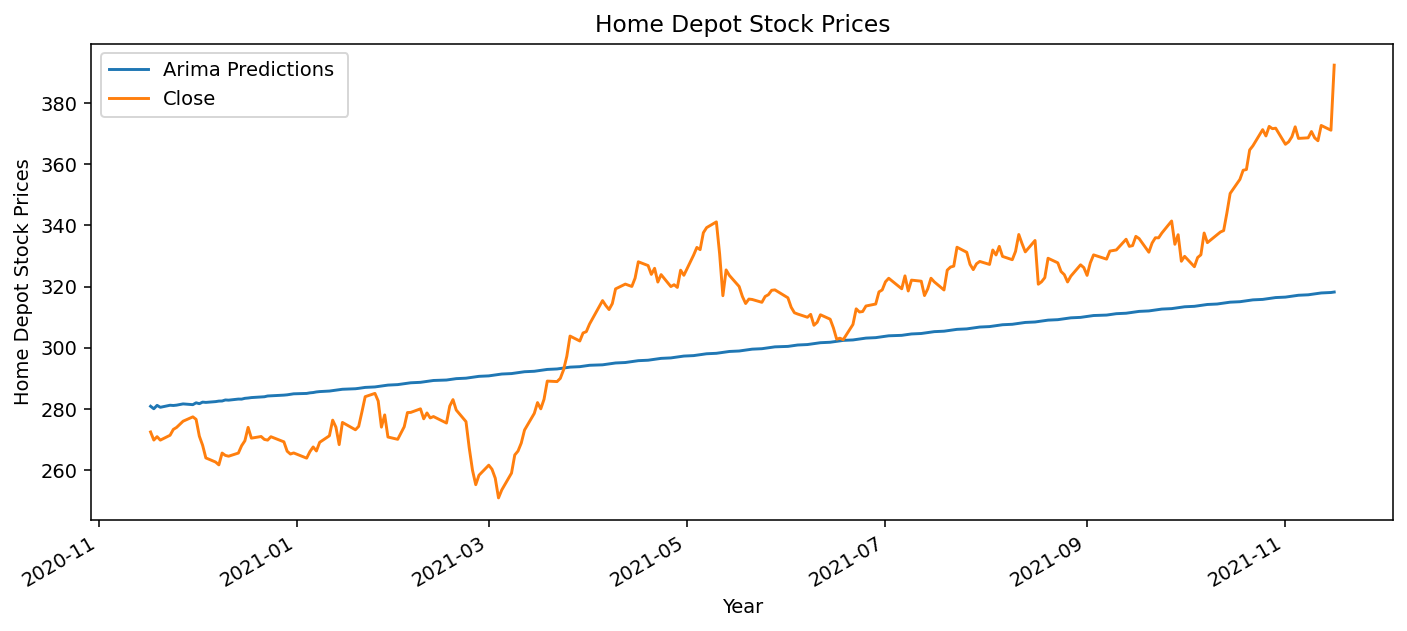

In [ ]:
pred.plot(legend=True)
test['Close'].plot(legend=True,figsize=(12,5))
plt.xlabel('Year')
plt.ylabel('Home Depot Stock Prices')
plt.title('Home Depot Stock Prices')

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Close'].mean()
rmse=sqrt(mean_squared_error(pred,test['Close']))
print(rmse)

24.262542120751682
